In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv("C:\Vasanth\Insurance_perdict\insurance.csv")

In [63]:
## TO display top 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
data.shape

(1338, 7)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
## Checking null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [67]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [68]:
## Converting string values into Numerical
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [69]:
data['sex'] = data['sex'].map({'female' :0 ,'male': 1})

In [70]:
data['smoker'] = data['smoker'].map({'yes' :1 ,'no': 0})

In [71]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [72]:
data['region'] = data['region'].map({'southwest' :1 ,'southeast': 2,'northwest':3,'northeast':4})

In [73]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [74]:
## Storing feature matrix and vector

X = data.drop(['charges'],axis =1)

In [75]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [76]:
y = data['charges']

In [77]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [78]:
## Train /test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [80]:
## Importing the models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
## Model Training

lr =LinearRegression()
lr.fit(X_train,y_train)
svm =SVR()
svm.fit(X_train,y_train)
rr = RandomForestRegressor()
rr.fit(X_train,y_train)
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)


GradientBoostingRegressor()

In [82]:
## Prediction on test data

y_predict = lr.predict(X_test)
y_predict1 = svm.predict(X_test)
y_predict2 = rr.predict(X_test)
y_predict3 = gb.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'lr': y_predict,'svm':y_predict1,'rr':y_predict2,'gb':y_predict3})

In [83]:
df1

,Actual,lr,svm,rr,gb
764,9095.06825,8924.407244,9548.261584,11572.419704,11001.128629
887,5272.17580,7116.295018,9492.515425,5009.812008,5840.174656
890,29330.98315,36909.013521,9648.758701,28472.365485,28001.980112
1293,9301.89355,9507.874691,9555.044136,9669.465108,9745.291602
259,33750.29180,27013.350008,9420.421978,34372.543978,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47501.400429,45431.423211
575,12222.89830,11814.555568,9625.431547,12048.573512,12465.025294
535,6067.12675,7638.107736,9504.168517,6416.625805,6974.336525
543,63770.42801,40959.081722,9605.004594,46762.544886,47862.047791


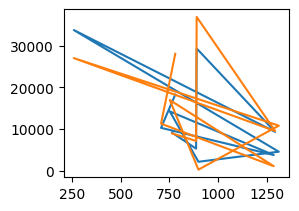

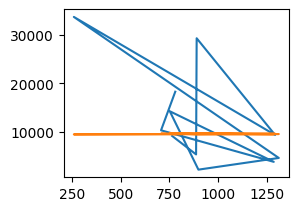

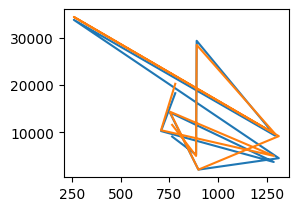

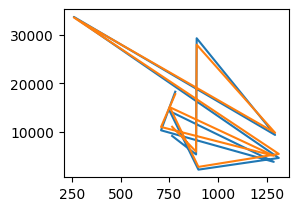

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [84]:
## Compare the model to find out better model 


import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['lr'].iloc[0:11],label ='lr')
plt.show()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['svm'].iloc[0:11],label ='svm')
plt.show()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['rr'].iloc[0:11],label ='rr')
plt.show()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['gb'].iloc[0:11],label ='gb')
plt.show()

plt.tight_layout


In [85]:
## Evaluting the algorthim

from sklearn import metrics

score = metrics.r2_score(y_test,y_predict)
score1 = metrics.r2_score(y_test,y_predict1)
score2 = metrics.r2_score(y_test,y_predict2)
score3 = metrics.r2_score(y_test,y_predict3)

print(score,score1,score2,score3)

0.7833463107364539 -0.07229762787861826 0.8666398495478324 0.8779936181637191


As we evaluating R2_score gradient boosting is the best model to fit

In [86]:
from sklearn import metrics

score = metrics.mean_absolute_error(y_test,y_predict)
score1 = metrics.mean_absolute_error(y_test,y_predict1)
score2 = metrics.mean_absolute_error(y_test,y_predict2)
score3 = metrics.mean_absolute_error(y_test,y_predict3)

print(score,score1,score2,score3)

4186.508898366434 8592.428727899724 2429.685829715579 2447.167158715136


AS we evalating mean aboslute error gradient boosting is the best fit model

In [88]:
## Predit on new value


new_data = {'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}
df5=pd.DataFrame(new_data,index=[0])
df5


,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [90]:
new_predict = gb.predict(df5)

In [91]:
new_predict

array([43931.13613049])

In [93]:
## Save the model using joblib

gb = GradientBoostingRegressor()
gb.fit(X,y)
 

GradientBoostingRegressor()

In [96]:
import joblib
joblib.dump(gb,'Model_insurance_gb')

['Model_insurance_gb']

In [97]:
model = joblib.load('Model_insurance_gb')

In [98]:
model.predict(df5)

array([42148.361888])